
# Non-Parametric Density Estimation

Let's get some quick practice with your new skills, you will be asked some basic questions about some hand-written adult income data

Standard scientific Python imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Import datasets, classifiers and performance metrics


In [ ]:
from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split


The adult dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML_HO5/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
from numpy import nan
df=data.replace("?",nan)

In [ ]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
occupation,280900,5.751
workclass,279900,5.731
native-country,85700,1.755
age,0,0.000
fnlwgt,0,0.000
education,0,0.000
educational-num,0,0.000
marital-status,0,0.000
relationship,0,0.000
race,0,0.000


#### fill nan number

In [ ]:
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)

In [ ]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
educational-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
gender,0,0.0


#### Data processing

#### educational-num seems to be not so important

In [ ]:
df=df.drop(["educational-num"],axis=1)

#### also fnlwgt is not so important

In [ ]:
df=df.drop(["fnlwgt"],axis=1)

creat label

In [ ]:
df.income = [1 if each=='>50K' else 0 for each in data.income]
y = df.income
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

As you can see i got labels as y and encoded them if bigger than 50K to 1 else 0.

In [ ]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [ ]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

In [ ]:
df[['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country']]=df[['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country']].apply(le.fit_transform)

In [ ]:
df.drop(['income'],axis=1).head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,8,3,1,4,6,3,2,1,0,0,39,38
1,21,3,11,2,4,0,4,1,0,0,49,38
2,11,1,7,2,10,0,4,1,0,0,39,38
3,27,3,15,2,6,0,2,1,98,0,39,38
4,1,3,15,4,9,3,4,0,0,0,29,38


Split data into train and test subsets

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(df,y,test_size=0.3,random_state=42)

## KNeighborsClassifier

Using adult data, Train a KNN Classifier and draw the confusion matrix according to the code.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))
disp = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % disp)

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     11233
           1       0.76      0.71      0.73      3420

    accuracy                           0.88     14653
   macro avg       0.84      0.82      0.83     14653
weighted avg       0.88      0.88      0.88     14653


Confusion matrix:
[[10473   760]
 [  996  2424]]


#### Train the classifier for different K,

In [ ]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

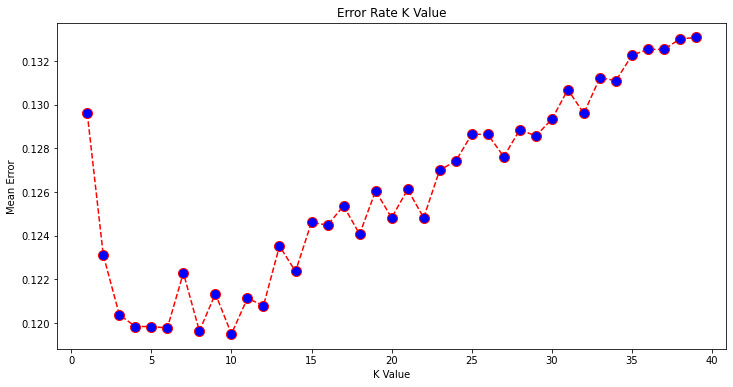

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Parzen

#### now train a kernerDensity model with diffrent kernels,

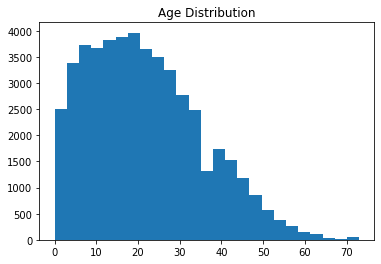

In [ ]:
x = df['age'].values
x_d = np.linspace(min(x)-2, max(x)+2, 1000)
from sklearn.neighbors import KernelDensity
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
plt.title("Age Distribution")
plt.hist(x, bins=25)
plt.show()
plt.close()


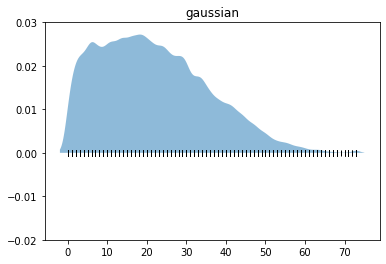

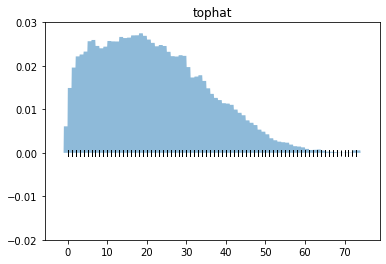

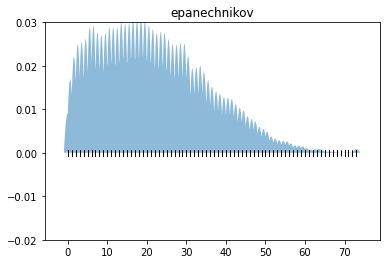

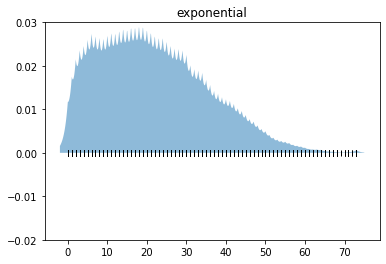

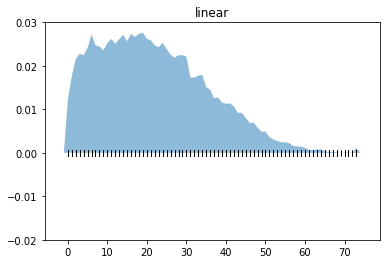

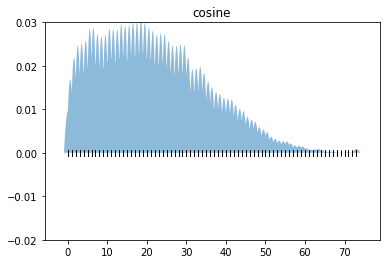

In [ ]:
# instantiate and fit the KDE model
for _kernel in kernels:
  kde = KernelDensity(bandwidth=1.0, kernel=_kernel)
  kde.fit(x[:, None])

  # score_samples returns the log of the probability density
  logprob = kde.score_samples(x_d[:, None])
  plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
  plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
  plt.ylim(-0.02, 0.03)
  plt.title(_kernel)
  plt.show()
  plt.close()


## Decision Tree

#### train a decision tree model with find its accuracy

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


#### Now change the model parameters to optimize it.

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split= 10, min_samples_leaf= 100)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


### Boosting

#### train a Boosting model for diffrrent max depth and different learning rate and find its accuracy for validation set 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

dep = np.arange(1,20)

for max_dep in dep:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth= max_dep, random_state=0)
    gb_clf.fit(x_train, y_train)

    print("Max Depth: ", max_dep)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))

Max Depth:  1
Accuracy score (training): 0.938
Accuracy score (validation): 0.940
Max Depth:  2
Accuracy score (training): 0.998
Accuracy score (validation): 0.998
Max Depth:  3
Accuracy score (training): 0.999
Accuracy score (validation): 1.000
Max Depth:  4
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Max Depth:  5
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Max Depth:  6
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Max Depth:  7
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Max Depth:  8
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Max Depth:  9
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Max Depth:  10
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Max Depth:  11
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Max Depth:  12
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Max Depth:  1

***Best Max_Depth: 4**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
BEST_DEP = 4
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=BEST_DEP, random_state=0)
    gb_clf.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.994
Accuracy score (validation): 0.994
Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000




**Best Learning Rate: 0.075**